# E7: Introduction to Computer Programming for Scientists and Engineers

## Lab Assignment 5

For each question, you will have to fill in one or more Python functions. We provide an autograder with a number of test cases that you can use to test your function. Note that the fact that your function works for all test cases thus provided does necessarily guarantee
that it will work for all possible test cases relevant to the question. It is your responsibility
to test your function thoroughly, to ensure that it will also work in situations not covered
by the test cases provided

In [1]:
# Please run this cell, and do not modify the contets
import numpy as np
import math
import heapq
import time
import matplotlib.pyplot as plt
import random
from timeit import default_timer as timer
np.seterr(all='ignore');
# %run lab5_ag.py

## Question 1: Algorithm Complexity and Big-O Notation

In this problem, you are presented with three sample Python functions, `f(x)`, `g(x)`, and
`myRecFactorial(n)`, shown below. Your job is to determine the complexity of each from
the options below, expressed in "Big-O" notation. First examine the three functions below
and select from options A-E. Then write a function that returns a triple of the three choices you selected.

Choices (same list of choices for the three functions):

(A) $O(n2)$

(B) $O(n)$

(C) $O(Cn)$, where C is a constant.

(D) $O(log(n))$

(E) $O(n3)$

In [2]:
# Three example functions below

def f(x):
    output = []
    for i in range(x):
        for j in range(x):
            for k in range(x):
                output.append(i*j*k)
    return output

def g(x):
    output = 0
    while x > 1:
        x /= 4
        output += 1
    return output

def myRecFactorial(n):
    if n == 1:
        out = 1
    else:
        out = n * myRecFactorial(n-1)
    return out

In [3]:
def myBigONotation():
    return 'E', 'D', 'B'

## Question 2: Braille

English Braille is a writing system that uses binary encoding. In grade 1 English Braille, each
letter of the alphabet and each number are represented by a cell that contains raised dots at
one or more of six locations, arranged as an array with 3 rows and 2 columns. Figure 1 shows
the English Braille representation of the 10 digits of the decimal system. We will represent
a Braille cell in Python as a 3 x 2 array where raised dots are represented by ones, and
zeros are used elsewhere. We will represent a sequence of n Braille cells in Python as a
3 x 2n array where individual cells have been concatenated horizontally. For example, the
integer 2 is represented as the 3 x 2 array: [[1, 0], [1, 0], [0, 0]] and 24 is represented as
the 3 x 4 array: [[1, 0, 1, 1], [1, 0, 0, 1], [0, 0, 0, 0]]. Note that in English Braille,
numbers are preceded by a "numeral sign" character, which we omit in this assignment.

![](resources/lab5_1.PNG)

In this problem, you will write two Python functions that convert numbers from their
Braille representations into other representations.

### 2.1 Braille conversion to double

Write a function `myBraille2Double(braille)` which returns `result`, the number represented by `braille`. `braille` is a 3 x 2n array which represents an integer as a sequence of Braille cells as described above.

In [4]:
def myBraille2Double(braille):
    """
    >>> myBraille2Double([[1,0,1,1],[1,0,0,1],[0,0,0,0]])
    24
    >>> myBraille2Double([[1,0,1,1,1,0],[1,0,0,1,0,0],[0,0,0,0,0,0]])
    241
    >>> myBraille2Double([[[1,0],[0,0],[0,0]],[[1,0],[0,1],[0,0]],[[1,1],[0,0],[0,0]],[[1,1],[1,0],[0,0]]])
    1536
    """
    braille = np.array(braille)
    one = [[1,0],[0,0],[0,0]]
    two = [[1,0],[1,0],[0,0]]
    three = [[1,1],[0,0],[0,0]]
    four = [[1,1],[0,1],[0,0]]
    five = [[1,0],[0,1],[0,0]]
    six = [[1,1],[1,0],[0,0]]
    seven = [[1,1],[1,1],[0,0]]
    eight = [[1,0],[1,1],[0,0]]
    nine = [[0,1],[1,0],[0,0]]
    zero = [[0,1],[1,1],[0,0]]

    if len(braille.shape)==2:
        n_digits = int(len(braille[2])/2)
        result = 0
        digit = -1
        for i in range(n_digits):
            sub_braille = braille[:,[i*2,i*2+1]]
            if np.array_equal(sub_braille, one):
                digit = 1
            elif np.array_equal(sub_braille, two):
                digit = 2
            elif np.array_equal(sub_braille, three):
                digit = 3
            elif np.array_equal(sub_braille, four):
                digit = 4
            elif np.array_equal(sub_braille, five):
                digit = 5
            elif np.array_equal(sub_braille, six):
                digit = 6
            elif np.array_equal(sub_braille, seven):
                digit = 7
            elif np.array_equal(sub_braille, eight):
                digit = 8
            elif np.array_equal(sub_braille, nine):
                digit = 9
            elif np.array_equal(sub_braille, zero):
                digit = 0
            else:
                raise ValueError("unrecognized braille")
            result = result + digit*(10**(n_digits-i-1))
    else:
        n_digits = len(braille)
        result = 0
        digit = -1
        for i in range(n_digits):
            sub_braille = braille[i]
            if np.array_equal(sub_braille, one):
                digit = 1
            elif np.array_equal(sub_braille, two):
                digit = 2
            elif np.array_equal(sub_braille, three):
                digit = 3
            elif np.array_equal(sub_braille, four):
                digit = 4
            elif np.array_equal(sub_braille, five):
                digit = 5
            elif np.array_equal(sub_braille, six):
                digit = 6
            elif np.array_equal(sub_braille, seven):
                digit = 7
            elif np.array_equal(sub_braille, eight):
                digit = 8
            elif np.array_equal(sub_braille, nine):
                digit = 9
            elif np.array_equal(sub_braille, zero):
                digit = 0
            else:
                raise ValueError("unrecognized braille")
            result = result + digit*(10**(n_digits-i-1))

    return result

### 2.2 Braille conversion to ASCII code

Write a function `myBraille2ASCII(braille)` 
where `braille` is a 3 x 2n array that represents an integer as a sequence of Braille cells as
described above, and `ASCII` is a 1 x n row vector, where each element is the ASCII code of the corresponding cell in braille. Table 2 shows the ASCII codes of the ten digits of the decimal system.

![](resources/lab5_2.PNG)

In Python, you can obtain the ASCII code of a character by using the following (for
example with the char '5') `ord('5')`. You can also check what character
is generated by an ASCII code by using `chr(53)` which will in this case return 5. See
http://www.asciitable.com/ for more information on ASCII tables.

In [5]:
def myBraille2ASCII(braille):
    """
    >>> myBraille2ASCII([[[1,0],[0,0],[0,0]],[[1,0],[0,1],[0,0]],[[1,1],[0,0],[0,0]],[[1,1],[1,0],[0,0]]])
    [49, 53, 51, 54]

    :param braille: braille encoding
    :return: ascii
    """
    number = myBraille2Double(braille)
    numberstr = str(number)

    n_digits = len(numberstr)
    ASCII = []

    for i in range(n_digits):
        ASCII.append(ord(numberstr[i]))

    return ASCII

## Question 3: Binary representations of integers

There are many ways to represent integers in binary format (i.e. with only zeros and ones).
In this problem, we only consider 8-bit representations: each integer will be represented in
binary format by a sequence of 8 zeros and/or ones. You will learn and use three different
binary representations for integers: "unsigned representation", "sign-magnitude representation", and "two's complement representation". Each of these representations is detailed
below.

In the unsigned representation, each bit represents a power of 2, from $2^0$ (right-
most bit) to $2^7$ (left-most bit). For example, the binary representation 00100100 represents
the integer $2^2 + 2^5 = 36$, and the binary representation 11101000 represents the integer
$2^7+2^6+2^5+2^3 = 232$. Note that negative integers cannot be represented with the unsigned
representation.

In the signed-magnitude representation, the left-most bit represents the sign of the
integer. If the left-most bit is 0, then the integer is positive. If the left-most bit is 1,
then the integer is negative. The other bits represent the magnitude of the integer, each
bit representing a power of 2, from $2^0$ (right-most bit) to $2^6$ (seventh bit from the right).
For example, the binary representation 00100100 still represents the number $2^2 + 2^5 = 36$,
while the binary representation 11101000 now represents the number $-(2^6 + 2^5 + 2^3) =
-104$. Note that there are two possible binary representations of zero in the sign-magnitude
representation (00000000 and 10000000).

In the two's complement representation, the left-most bit represents -27 if it is 1,
and 0 if it is 0. The other seven bits are used in the same way as in the unsigned and
signed-magnitude representations. For example, the binary representation 00100100 still
represents the number 36, while the binary representation 11101000 now represents the
number $-2^7 + 2^6 + 2^5 + 2^3 = -24$.

Write a function `myBinary2Num(binary, representation)` that outputs `result`,
where `binary` is a character string of length 8 made of only zeros and ones, and `representation`
is the name of the representation used for binary, given as a character string that can take
one of the three following values: 'unsigned', 'sign-magnitude' and 'twos complement'.
Your function should return in its output argument `result`, the number (in base 10, class double) that is represented by binary using the binary representation specified
by `representation`.

In [6]:
def myBinary2Num(binary, representation):
    """
    >>> myBinary2Num('11001000', 'unsigned')
    200
    >>> myBinary2Num('11001000', 'sign-magnitude')
    -72
    >>> myBinary2Num('11001000', 'twos complement')
    -56
    >>> myBinary2Num('01001110', 'unsigned')
    78
    >>> myBinary2Num('11001110', 'sign-magnitude')
    -78
    >>> myBinary2Num('11001110', 'twos complement')
    -50

    :param binary: character string of length 8, binary
    :param representation: name of representation for binary
    :return: output argument result in base 10
    """
    num = str(binary)
    result = 0

    if representation == 'unsigned':
        for i in range(0, len(num)):
            if num[i] == '1':
                result += 2**(7-i)

    elif representation == 'sign-magnitude':
        sign = 1
        if num[0] == '1':
            sign = -1
        for i in range(1, len(num)):
            if num[i] == '1':
                result += 2**(7-i)
        result *= sign

    elif representation == 'twos complement':
        if num[0] == '1':
            result = result - 2**7
        for i in range(1, len(num)):
            if num[i] == '1':
                result += 2**(7-i)

    return result

## Question 4: Floating Point Numbers

### 4.1: Comparing Floating Point Numbers

Write a function `myCompareFloats(x, y, tolerance)` that returns a tuple `exact, approx`, where `x`, `y`, and `tolerance` are scalars of class double, and `exact` and `approx` are scalars
of class boolean. `exact` should be true (logical 1) if and only if `x == y` evaluates to true in
Python. `approx` should be true if and only if the difference between `x` and `y` (in absolute
value) is less than or equal to tolerance. In other words, the function's output argument
approx indicates whether `x` and `y` are "approximately equal", where "approximately equal"
is quantified by the input argument tolerance.

In [7]:
def myCompareFloats(x, y, tolerance=1e-9):
    """
    >>> myCompareFloats(2+3, 5, 0)
    (True, True)
    >>> myCompareFloats(0, 0.001, 1e-2)
    (False, True)

    :param x: scalar, float
    :param y: scalar, float
    :param tolerance: absolute
    :return: if the floats are about equal
    """
    exact = (x==y)
    approx = (abs(x-y)<=tolerance)
    return exact, approx

You do not have to submit any answer to the following questions to complete this assign-
ment, but you should think about the answers to improve your understanding of the use of
floating point numbers.

- Why is exact equal to 0 in the last test case, while the following equality is mathemat-
ically true: 0.1 + 0.2 = 0.3? Try displaying 0.3 and then 0.1+0.2 with 25 digits.

- Given two numbers $x$ and $y$, how would you decide what value to use for the function's
input argument tolerance?

### Binary representation of floating point numbers (IEEE-754)

There are multiple ways to represent floating point numbers in binary format (i.e. with
only zeros and ones). The Institute of Electrical and Electronics Engineers (IEEE) defined a
standard (called IEEE-754) for representing floating point numbers in binary format. IEEE-754 specifies diferent formats, depending on how many bits (e.g. 16 bits, 32 bits, 64 bits, 128 bits) are used to represent each 
floating point number. The formats that use 32 bits and
64 bits to represent each number are commonly known as "single precision" and "double
precision", respectively. 

In Python, you can experiment by defining a variable a that
contains the value 1 (`a = 1`) in the command window and then using the function ???
to inspect the variables currently defined in the workspace. 

You should see that the class
of variable `a` is "double" (short for double precision) and that it occupies 8 bytes = 64 bits
of memory. 

In this problem, we only consider single precision representations, where each
number is represented using 32 bits (i.e. a sequence of 32 zeros and/or ones). We index the
bits from left to right: the left-most bit is the 1st bit and the right-most bit is the 32nd bit. In
the IEEE-754 standard, the number represented by a sequence of 32 bits can be calculated
using the following formulae:

$$\begin{align}
(-1)^s \times 2^{e-d} \times (1+f) && \text{if} \; e \ne 0 \; \text{and} \; e \ne 255 \\
(-1)^s \times 2^{1-d} \times f && \text{if} \; e = 0 \; \text{and} \; f \ne 255 \\
0 && \text{if} \; e = 0 \; \text{and} \; f = 255 \\
(-1)^s \times \infty && \text{if} \; e = 255 \; \text{and} \; f = 0 \\
NaN \;(\text{Not a Number}) && \text{if} \; e = 255 \; \text{and} \; f \ne 0
\end{align}$$

- $s$ is the value of the first bit
- $d = 127$
- $e$ is given by the integer represented by bits 2 through 9, using the unsigned 8-bit
integer representation (see Problem 3); and
- The value of $f$ is calculated using bits 10 through 32, each bit representing a $negative$
power of 2, from $2^{-1}$ (10th bit) to $2^{-23}$ (32nd bit).

Write a function `mySingle2Decimal(binary)` that outputs `result`, where `binary` is a character string of length 32 made of only zeros and ones, and `result` is the floating point number (in base 10, Python class "double") that is represented by
binary using the IEEE-754 32-bit single precision binary representation. 

In Python, use `np.inf` as the infinite value and `np.nan` for quantities which are "not a number".

In [8]:
def mySingle2Decimal(binary):
    """
    >>> mySingle2Decimal ('00111111111100000000000000000000')
    1.875
    >>> mySingle2Decimal ('10111111000000000000000000000000')
    -0.5
    >>> mySingle2Decimal ('00100000100000000000000000000001')
    2.1684046034649503e-19
    >>> mySingle2Decimal ('11111111100000000000000000000000')
    -inf
    >>> mySingle2Decimal ('11111111100000000000000000000001')
    nan
    >>> mySingle2Decimal ('10111111010000000000000000000000')
    -0.75
    >>> mySingle2Decimal ('00100000100000000000111000000001')
    2.1693310457510097e-19

    :param binary:
    :return:
    """
    num = str(binary)
    value_s = int(num[0])
    value_d = 127
    value_e = myBinary2Num(num[1:9], 'unsigned')

    value_f = 0
    for i in range(9,32):
        if num[i] == '1':
            value_f = value_f + 2**(8-i)

    if not math.isclose(value_e, 0) and not math.isclose(value_e, 255):
        result = ((-1)**value_s)*(2**(value_e-value_d))*(1+value_f)
    elif math.isclose(value_e, 0) and not math.isclose(value_f, 0):
        result = ((-1)**value_s)*(2**(1-value_d))*value_f
    elif math.isclose(value_e, 0) and math.isclose(value_f, 0):
        result = 0
    elif math.isclose(value_e, 255) and math.isclose(value_f, 0):
        result = ((-1)**value_s)*np.Inf
    else:
        result = np.NaN

    return result

You do not have to submit any answer to the following questions to complete this as-
signment, but you should think about the answers to improve your understanding of the
representation of floating point numbers in computers.

- What is the "precision" of the IEEE-754 representations when representing a number
close to 0? What about for a number close to 1020? In Python use the function `np.spacing`
to investigate the precision of the IEEE-754 representation for a given number.

- What is the trade-off for using either the IEEE-754 32-bit or the 64-bit representation?

## Question 5: Sorting and effciency of sorting algorithms

In this problem, you will write Python functions to sort elements of the periodic table
in alphabetical order (in parts a and b) and then compare (in part c) the efficiency of your
sorting function against the efficiency of another sorting function that is given to you on
bCourses. Note that the grading will not depend on the efficiency of your sorting algorithm,
but your function does need to sort the elements properly.

### 5.1: Compare two elements

Write a function `myCompareElements(element1, element2)` that returns `result`,
where `element1` and `element2` are the names (as character strings) of two elements of the
periodic table (for example: 'Hydrogen', 'Carbon'). The full list of the elements of the
periodic table can be found in Figure 5, and in a separate text file on bcourses.

Your function should return one of the following numbers (Python class "double"):
- 0 if `element1` and `element2` are the same element.
- 1 if the name of `element1` comes before the name of `element2` in alphabetical order.
- -1 if the name of `element1` comes after the name of `element2` in alphabetical order.

In this assignment, alphabetical ordering is determined by the ASCII codes of the letters
making up the names of the elements. A letter with a small ASCII code comes before a
letter with a larger ASCII code. Note that in this assignment, the names of the elements
will always be given to you with the first letter in upper case and all the other letters in lower
case. 

**Your function `myCompareElements` must not use Python's built-in sorting functions nor the function `GSISortElements`.**

Hint: you can compare the alphabetical ordering of two single characters in Python
with the logical operators `<`, `>`, and `==`. For example, `'b' < 'a'` will evaluate to `false` (0).

In [9]:
def myCompareElements(element1, element2):
    """
    >>> element1, element2 = 'Hydrogen', 'Carbon'
    >>> myCompareElements (element1 , element2)
    -1
    >>> myCompareElements (element2 , element1)
    1
    >>> myCompareElements (element1 , element1)
    0
    >>> element1, element2 = 'Uranium', 'Boron'
    >>> myCompareElements (element1 , element2)
    -1
    >>> myCompareElements (element2 , element1)
    1
    >>> myCompareElements (element1 , element1)
    0
    >>> element1, element2 = 'Plutonium', 'Hydrogen'
    >>> myCompareElements (element1 , element2)
    -1
    >>> myCompareElements (element2 , element1)
    1
    >>> myCompareElements (element1 , element1)
    0

    :param element1: name of element of periodic table
    :param element2: different element
    :return: comparison
    """
    if element1 < element2:
        return 1
    elif element1 == element2:
        return 0
    else:
        return -1

### 5.2: Sort a list of elements

Write a function `mySortElements(elements)`,
where `elements` is a $1 \times n$ cell array that represents a list of n elements of the periodic
table. Each cell of the cell array contains the name of an element of the periodic table as a
character string. Multiple cells of elements can represent the same element (i.e. there can
be duplicate elements in the list).

The function should return a $1 \times n$ cell array that represents the same list of elements as
the one represented by elements but sorted in alphabetical order. If `elements` is an empty
cell array, then sorted should be an empty cell array. 

**Your function mySortElements
must not use Python's built-in sort sort or the function GSISortElements**

Hints:

- You may want to use the function myCompareElements which you wrote in part 1 of
this problem.
- You can find below the description of a sorting algorithm that you can use (it is more
simple to implement but less efficient than many other sorting algorithms):

1. Create an empty cell array (e.g. `sorted=[]`) that will eventually contain the
sorted elements;
2. Find the element in the unsorted cell array that has the lowest rank in alphabetical
order. (Hint: your function `myCompareElements` may be useful to achieve this
goal);
3. Add that element at the end of the sorted cell array;
4. Remove that element from the unsorted cell array (Use `del elements[i]` to
remove the cell with index i from cell array elements);
5. Repeat steps 2 through 5 until the unsorted array is empty.

- You can use Python's built-in function sort or the function `GSISortElements` (see
next part) to check that your function is working properly. However, you cannot call
these functions from within your function `mySortElements`.

In [10]:
def mySortElements(elements):
    """
    >>> elements=['Hydrogen' , 'Carbon' , 'Magnesium' , 'Calcium' , 'Carbon']
    >>> mySortElements(elements)
    ['Calcium', 'Carbon', 'Carbon', 'Hydrogen', 'Magnesium']
    >>> elements=['Dubnium','Bohrium','Copernicium','Meitnerium','Roentgenium']
    >>> mySortElements(elements)
    ['Bohrium', 'Copernicium', 'Dubnium', 'Meitnerium', 'Roentgenium']
    >>> elements=['Argon','Argon']
    >>> mySortElements(elements)
    ['Argon', 'Argon']

    :param elements: 1xn cell array representing list of n elements of periodic table
    :return: 1xn cell array that represents the sorted list
    """
    sorted = []
    heapq.heapify(elements)
    while len(elements) > 0:
        sorted.append(heapq.heappop(elements))
    return sorted

### 5.3: Efficiency of sorting algorithms

You must complete part 2 of this problem before you can do this part. Write a function
that compares the effciency of the `mySortElements` function you wrote in part 2 of this
problem to the efficiency of the sorting function `GSISortElements` that is available as a `.pyc`
file on bCourses. Here, we define efficiency as the time taken by the sorting function to sort
a given list of elements. Note that there are many other criteria that should be considered
for a more exhaustive characterization of the efficiency of an algorithm (for example RAM
usage), but we ignore these in this assignment. Write the function `myCompareSorting(n)`

The function's input argument `n` is an integer, strictly greater
than zero. Your function must create a plot of the time taken by your function `mySortElements`
(as well as the time taken by the function `GSISortElements`) to sort an array of elements
versus the size of the array. More precisely, your function must do the following:

- For each integer m between 1 and n (1 and n included):
 - Generate a $1 \times m$ cell array of randomly chosen elements of the periodic ta-
    ble. Use the function GSIRandomElements available as a .pyc file on bCourses to
    generate such a cell array. The header of the `GSIRandomElements` function is
    function [elements] = GSIRandomElements(m), where m is an integer larger than or equal to zero, and elements is a $1 \times m$ cell
    array of randomly chosen elements of the periodic table.
 - Sort the same list of elements twice, once using the `mySortElements` function you
    wrote in part 2 and once more using the function `GSISortElements`. The input
    and output arguments of `GSISortElements` are the same as for `mySortElements`.
    Measure the amount of time taken by these two functions (separately) to sort the
    list of elements using the Python function `time.time()`.
 - During execution of the function `myCompareSorting` the function
    `GSIRandomElements` should only be called once to create a $1 \times n$ cell array.
    To sort a smaller ($1 \times m$) array, use the first m elements of the output of
    `GSIRandomElements`.

- On a single figure, plot the execution times corresponding to your mySortElements
function versus the number of elements being sorted. On the same plot, use another
color to plot the execution times corresponding to `GSISortElements` function versus
the number of elements being sorted. Format the plot appropriately (i.e. label x- and
y-axes, add a legend box or line labels, etc.). Figure 4 shows an example obtained with
two different sorting algorithms and n = 200. You can use a legend box instead of line
labels on your plot.

Hint: You can find below an example of the use of the Python functions tic and toc
to measure the execution time of a piece of code:

```Python
t = time.time()
FibRec(25)
t = time.time() - t
```

After executing this code, the variable time will contain the execution time (in seconds) of
the piece of code located between the calls to tic and toc, which in this case is a call to the
function FibRec.

![](resources/E7_Lab5_1.jpg)

Note that the grading will not depend on the efficiency of your sorting algorithm (but
your function `mySortElements` must sort the elements properly). For this problem, it does
not matter whether your function `mySortElements` runs slower or faster than the sample
function `GSISortElements`. One goal of this problem is to confront you with the fact that
there might be multiple ways to achieve the same goals (e.g. sort in alphabetical order) using
computer programming. Some algorithms are more efficient than others, some algorithms
are easier to implement than others, etc. Note that the efficiency of a given algorithm can
vary under dierent conditions (e.g. is the list of elements already a little bit or completely
sorted?). Also note that execution time depends on other criteria such as computer hardware,
amount of RAM used by other applications, etc. You do not need to submit the plot for
this problem, just the function file.

In [11]:
def myCompareSorting(n):
    """

    :param n: integer greater than 0
    :return: chart of time comparison
    """
    time_student = []
    time_gsi = []
    elems = [random.random() for _ in range(int(n))]
    # x_ax = [2**i for i in range(int(math.ceil(math.log(n, 2))))]
    x_ax = []
    i = n//10
    while i < n:
        t = time.time()
        mySortElements(elems[:i])
        time_student.append((time.time() - t)*1000)

        t = time.time()
        sorted(elems[:i])
        time_gsi.append((time.time() - t)*1000)

        x_ax.append(i)

        i += n//10

    fig, ax = plt.subplots()
    plt.xlabel('Size of list to sort')
    plt.ylabel('Wall time taken by sorted alg (ms)')
    plt.title('Comparision of sorting algs')
    print(time_student)
    print(time_gsi)
    ax.plot(x_ax, time_student, label='student')
    ax.plot(x_ax, time_gsi, label='gsi')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    plt.show()

[70.88494300842285, 192.60692596435547, 356.11701011657715, 456.00414276123047, 705.8870792388916, 1077.1431922912598, 1570.2929496765137, 1905.5149555206299, 2088.831901550293]
[32.460927963256836, 72.68619537353516, 117.53988265991211, 169.14105415344238, 237.88785934448242, 382.641077041626, 450.8318901062012, 544.5749759674072, 631.1609745025635]


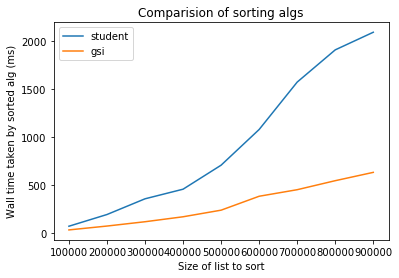

In [12]:
myCompareSorting(int(1e6))